In [11]:
import re
import paper
import database
import importlib
import numpy as np
import networkx as nx
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

In [86]:
importlib.reload(database)
importlib.reload(paper)
db = database.Database()
db.initialize_parents("parents.txt")
#db.sync_parents()
#db.rewrite_parents("parents.txt")
db.initialize_children()

Number of parents read from file: 221
All parents added from file; no lookup necessary
(1 of 221) Bib #1: All children added from file
(2 of 221) Bib #10: All children added from file
(3 of 221) Bib #100: All children added from file
(4 of 221) Bib #101: All children added from file
(5 of 221) Bib #102: All children added from file
DON'T ADD AN EMPTY PAPER, DUMMY
(6 of 221) Bib #103: All children added from file
(7 of 221) Bib #104: All children added from file
(8 of 221) Bib #105: All children added from file
(9 of 221) Bib #106: All children added from file
(10 of 221) Bib #107: All children added from file
(11 of 221) Bib #108: All children added from file
(12 of 221) Bib #109: All children added from file
(13 of 221) Bib #11: All children added from file
(14 of 221) Bib #110: All children added from file
(15 of 221) Bib #111: All children added from file
(16 of 221) Bib #112: All children added from file
(17 of 221) Bib #113: All children added from file
(18 of 221) Bib #114: All c

In [87]:
total_references = 0
j = 0
for bib in db.bibs:
    j += 1
    with open(bib, errors="backslashreplace") as input:
        inputstr = input.read()
        splits = re.split('\[[0-9]+\]', inputstr.strip(' '))
        total_references += len(splits) - 2
print(total_references)

7790


[1736. 1837. 1889. 1906. 1909. 1913. 1914. 1917. 1930. 1933. 1936. 1937.
 1938. 1940. 1945. 1946. 1947. 1948. 1950. 1951. 1952. 1953. 1954. 1955.
 1956. 1957. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968.
 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980.
 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992.
 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018.]
[  1. 102. 154. 171. 195. 210. 229. 246. 263. 280.] [1736. 1837. 1889. 1906. 1930. 1945. 1964. 1981. 1998. 2015.]


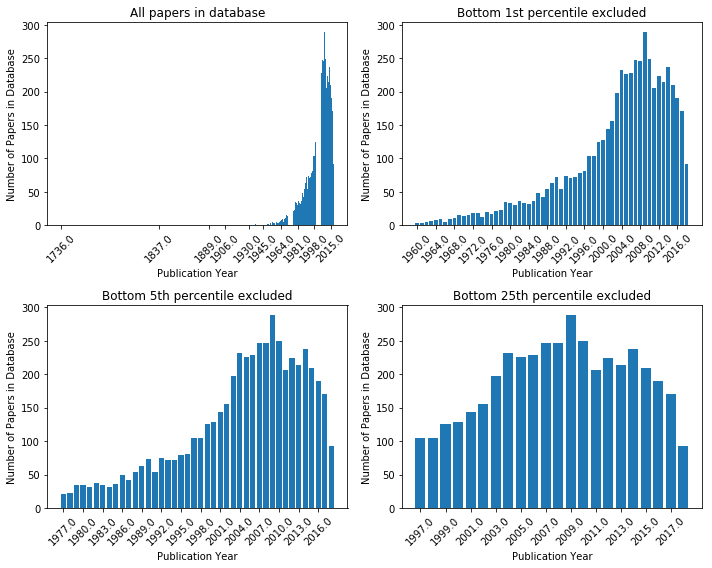

In [120]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
years_count = defaultdict(int)
for p_hash, p in db.all_papers.items():
    if p.year != "None":
        years_count[p.year] += 1
        
xvals = np.array(sorted(years_count.keys()))
print(xvals)
x_pos = xvals - xvals[0] + 1
yvals = np.array([years_count[xvals[i]] for i in range(len(xvals))])
dist = np.cumsum(yvals)

fig, axes = plt.subplots(2,2)
ax11 = axes[0,0]
ax12 = axes[0,1]
ax21 = axes[1,0]
ax22 = axes[1,1]

ax11.bar(x_pos, yvals, align='center')
ax11.tick_params(axis='x', rotation=45)
tickvals = np.concatenate((x_pos[:4],x_pos[8:9],x_pos[14::17]))
ticklabels = np.concatenate((xvals[:4],xvals[8:9],xvals[14::17]))
print(tickvals, ticklabels)
ax11.set_xticks(tickvals)
ax11.set_xticklabels(ticklabels)
ax11.set_xlabel("Publication Year")
ax11.set_ylabel("Number of Papers in Database")
ax11.set_title("All papers in database")

start = np.where(dist <= dist[-1]*0.05)[0][-1]
ax21.bar(x_pos[start:], yvals[start:], align='center')
ax21.tick_params(axis='x', rotation=45)
ax21.set_xticks(x_pos[start::3])
ax21.set_xticklabels(xvals[start::3])
ax21.set_xlabel("Publication Year")
ax21.set_ylabel("Number of Papers in Database")
ax21.set_title("Bottom 5th percentile excluded")

start = np.where(dist <= dist[-1]*0.25)[0][-1]
ax22.bar(x_pos[start:], yvals[start:], align='center')
ax22.tick_params(axis='x', rotation=45)
ax22.set_xticks(x_pos[start::2])
ax22.set_xticklabels(xvals[start::2])
ax22.set_xlabel("Publication Year")
ax22.set_ylabel("Number of Papers in Database")
ax22.set_title("Bottom 25th percentile excluded")

start = np.where(dist <= dist[-1]*0.01)[0][-1]
ax12.bar(x_pos[start:], yvals[start:], align='center')
ax12.tick_params(axis='x', rotation=45)
ax12.set_xticks(x_pos[start::4])
ax12.set_xticklabels(xvals[start::4])
ax12.set_xlabel("Publication Year")
ax12.set_ylabel("Number of Papers in Database")
ax12.set_title("Bottom 1st percentile excluded")

fig.tight_layout()

fig.savefig('year_distribution.png',dpi='figure')

In [31]:
parent_citations = dict()
for p_hash, ref_list in db.parents.items():
    p = db.all_papers[p_hash]
    parent_citations[p.citation] = p
    
for bib in db.bibs:
    
    with open(bib, errors="backslashreplace") as input:
        
        splits = re.split('\[[0-9]+\] ', input.read().strip(' ').strip('\n'))
        p = parent_citations[splits[1].strip('\n').strip(' ')]
        ref_list = db.parents[p.hash]

        print(p.hash, "\n\tlen(ref_list):", len(ref_list), "vs len(splits):",
             len(splits)-1)

('Fifty years of graph matching, network alignment and network comparison', 2016) 
	len(ref_list): 122 vs len(splits): 126
('A linear programming approach for the weighted graph matching problem', 1993) 
	len(ref_list): 12 vs len(splits): 13
('Pattern recognition by homomorphic graph matching using Hopfield neural networks', 1995) 
	len(ref_list): 47 vs len(splits): 48
('Retinal Fundus Image Registration via Vascular Structure Graph Matching', 2010) 
	len(ref_list): 33 vs len(splits): 34
('A multigrid method based on graph matching for convection-diffusion equations', 2002) 
	len(ref_list): 40 vs len(splits): 41
('A Quantum Observable for the Graph Isomorphism Problem', 1999) 
	len(ref_list): 6 vs len(splits): 7
('Hadamard equivalence via graph isomorphism', 1979) 
	len(ref_list): 1 vs len(splits): 2
('Symbol recognition in electrical diagrams using probabilistic graph matching', 1985) 
	len(ref_list): 11 vs len(splits): 12
('Parallel algorithms for permutation groups and graph isomorp

#### Verification statistics for both parents and children

In [8]:
auto_verified = 0
for p_hash, p in db.all_papers.items():
    if p.auto_verified:
        auto_verified += 1
print("Verification statistics for all papers:")
print(str(auto_verified) + "/" + str(len(db.all_papers)) + " papers auto-verified")
print(auto_verified/len(db.all_papers))

auto_verified = 0
for p_hash, ref_list in db.parents.items():
    if db.all_papers[p_hash].auto_verified:
        auto_verified += 1
print("\nVerification statistics for just parents")
print(str(auto_verified) + "/" + str(len(db.parents)) + " papers auto-verified")
print(auto_verified/len(db.parents))

Verification statistics for all papers:
3110/6268 papers auto-verified
0.49617102744097

Verification statistics for just parents
162/205 papers auto-verified
0.7902439024390244


#### Plot normalized citation and reference counts by year (for both parents and all_papers)

In [17]:
refs_by_year = defaultdict(list)
citations_by_year = defaultdict(list)

for p_hash, ref_list in db.parents.items():
    p = db.all_papers[p_hash]
    refs_by_year[p.year].append(p.reference_count)
    citations_by_year[p.year].append(p.is_referenced_by_count)

all_refs_by_year = defaultdict(list)
all_citations_by_year = defaultdict(list)
for p_hash, p in db.all_papers.items():
    all_refs_by_year[p.year].append(p.reference_count)
    all_citations_by_year[p.year].append(p.is_referenced_by_count)
    
# TODO 

#### Check the reference counts we have vs. those given by CrossRef

In [14]:
has_children = 0
for parent_hash, ref_list in db.parents.items():
    if len(ref_list) > 0:
        p = db.all_papers[parent_hash]
        if len(ref_list) != p.reference_count:
            print(p.title + "\n", p.reference_count, "vs", len(ref_list))
            p.reference_count = len(ref_list)

Fifty years of graph matching, network alignment and network comparison
 125 vs 122
Retinal Fundus Image Registration via Vascular Structure Graph Matching
 28 vs 33
Symbol recognition in electrical diagrams using probabilistic graph matching
 12 vs 11
Parallel algorithms for permutation groups and graph isomorphism
 29 vs 27
A Randomized Heuristic for Scene Recognition by Graph Matching
 0 vs 21
DOGMA: A Disk-Oriented Graph Matching Algorithm for RDF Databases
 0 vs 23
A classical approach to the graph isomorphism problem using quantum walks
 20 vs 17
Recent developments in graph matching
 65 vs 60
Conceptual graph matching: a flexible algorithm and experiments
 8 vs 7
Detecting Self-mutating Malware Using Control-Flow Graph Matching
 0 vs 23
A Graph Matching Based Approach to Fingerprint Classification Using Directional Variance
 0 vs 19
Information Retrieval with Conceptual Graph Matching
 0 vs 11
Opcode graph similarity and metamorphic detection
 33 vs 30
Learning with Preknowledge

#### Count how many papers have a reference list, and how many of those include a DOI number

In [16]:
has_doi = 0
doitotal = 0

has_ref = 0
reftotal = 0
for p_hash, p in db.all_papers.items():

    reftotal += 1

    if 'reference' in p.item.keys():

        has_ref += 1

        for i in range(len(p.item['reference'])):

            doitotal += 1
            refdict = p.item['reference'][i]

            if 'DOI' in refdict:
                has_doi += 1

print("References with DOI:", has_doi, "/", doitotal, "=", has_doi/doitotal)
print("Papers with a reflist:", has_ref, "/", reftotal, "=", has_ref/reftotal)

References with DOI: 29911 / 47214 = 0.6335197187274961
Papers with a reflist: 1356 / 6268 = 0.21633694958519464


In [101]:
print(np.concatenate((np.array([1,2]).reshape(1,2),np.array([3,4]).reshape(1,2)),axis=1)[0])

[1 2 3 4]
